In [154]:
#@author Shivam Singhal
import pandas
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime
import itertools
import time
import operator
%matplotlib inline
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

from collections import Counter
from IPython.display import display

In [155]:
data = pandas.read_csv('BreadBasket_DMS.csv')
data.drop(data[data['Item']=='NONE'].index, inplace=True)

Item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
dtype: int64


Text(0.5, 1.0, 'Top 10 Items Sold')

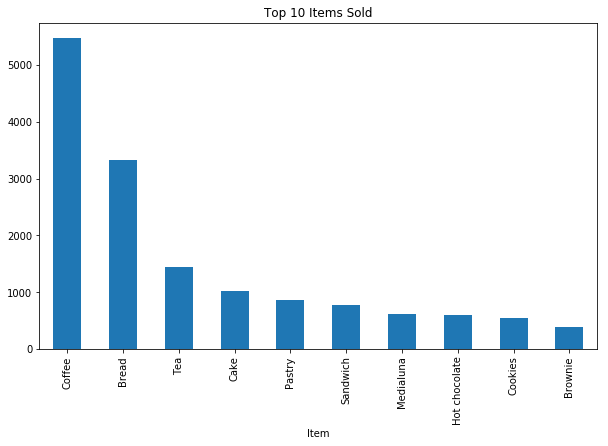

In [156]:
#1.     Find out the frequency of top 10 selling items.    
sold=data.groupby('Item').size().sort_values(ascending = False).head(10)
print(sold)
plt.figure(figsize=(10,6))
sold.plot(kind='bar')
plt.title('Top 10 Items Sold')

Item
Coffee       2214
Bread        1390
Tea           577
Pastry        366
Medialuna     362
dtype: int64


Text(0.5, 1.0, 'Five most popular bakery items in 2016')

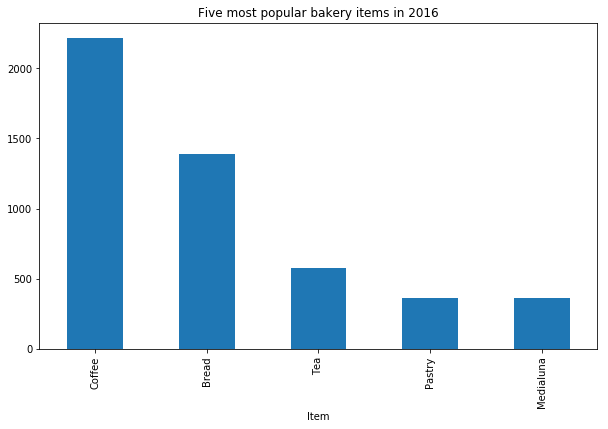

In [157]:
#2.     Find out the five most popular bakery items in 2016.
data2 = data[data.Date <= '2016-12-31']
data2a=data2.groupby('Item').size().sort_values(ascending = False).head(5)
print(data2a)
plt.figure(figsize=(10,6))
data2a.plot(kind='bar')
plt.title('Five most popular bakery items in 2016')

Item
Coffee      3257
Bread       1935
Tea          858
Cake         762
Sandwich     536
dtype: int64


Text(0.5, 1.0, 'Five most popular bakery items in 2017')

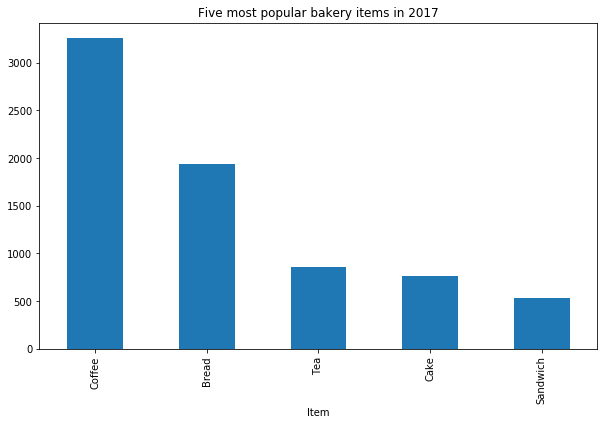

In [158]:
#3.     Find out the five most popular bakery items in 2017.      
data3 = data[data.Date > '2016-12-31']
data3a=data3.groupby('Item').size().sort_values(ascending = False).head(5)
print(data3a)
plt.figure(figsize=(10,6))
data3a.plot(kind='bar')
plt.title('Five most popular bakery items in 2017')

Item
Coffee      681
Bread       360
Tea         193
Pastry      105
Sandwich    101
dtype: int64


Text(0.5, 1.0, 'Five most popular items sold on Monday.')

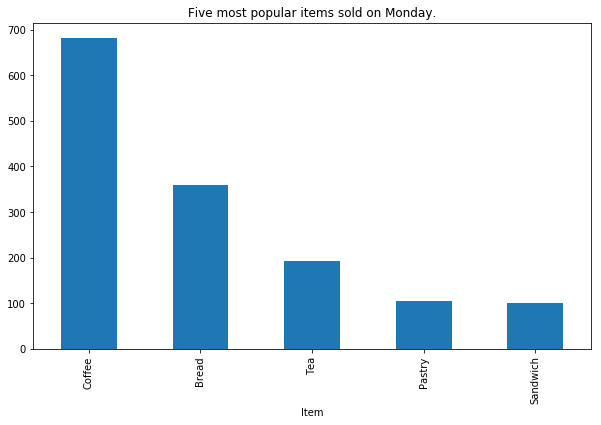

In [159]:
#4.     Find out the five most popular items sold on Monday.

data['Year'] = data['Date'].apply(lambda x: x.split("-")[0])
data['Month'] = data['Date'].apply(lambda x: x.split("-")[1])
data['Day'] = data['Date'].apply(lambda x: x.split("-")[2])
data['Date_Time'] = pandas.to_datetime(data['Date']+" "+data['Time'])
data['WeekDay'] = data['Date_Time'].dt.dayofweek
data['Hour'] = data['Date_Time'].dt.hour
data4 = data[data.WeekDay == 0]
data4a=data4.groupby('Item').size().sort_values(ascending = False).head(5)
print(data4a)
plt.figure(figsize=(10,6))
data4a.plot(kind='bar')
plt.title('Five most popular items sold on Monday.')

01    3356
02    3906
03    3944
04    1157
10     369
11    4436
12    3339
Name: Month, dtype: int64


Text(0.5, 1.0, 'Find out the number of items sold per month.')

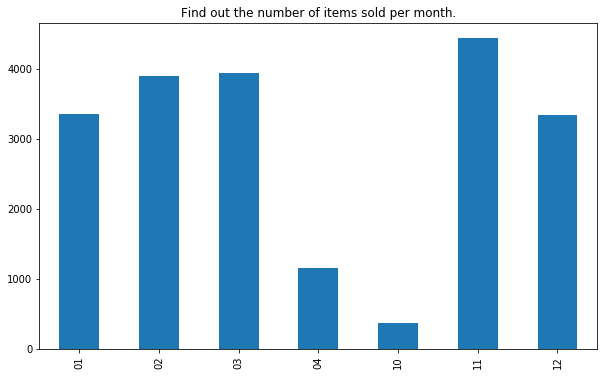

In [160]:
#5.     Find out the number of items sold per month.

data5 = data['Month'].value_counts()
data5a=data5.sort_index()

print(data5a)
plt.figure(figsize=(10,6))
data5a.plot(kind='bar')
plt.title('Find out the number of items sold per month.')

0    2324
1    2392
2    2321
3    2646
4    3124
5    4605
6    3095
Name: WeekDay, dtype: int64


Text(0.5, 1.0, 'Find out the number of items sold per weekday. ')

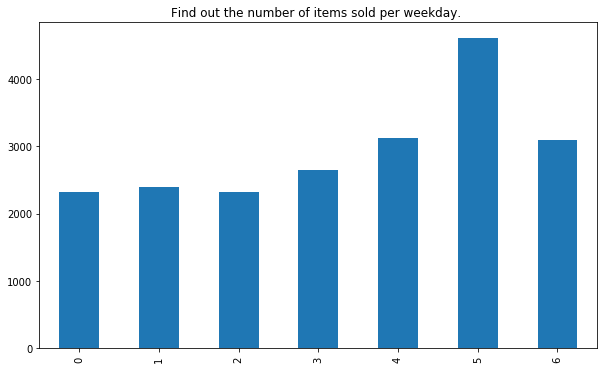

In [161]:
#6.     Find out the number of items sold per weekday. 
data6 = data['WeekDay'].value_counts()
data6a=data6.sort_index()
print(data6a)

plt.figure(figsize=(10,6))
data6a.plot(kind='bar')
plt.title('Find out the number of items sold per weekday. ')

1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: Hour, dtype: int64


Text(0.5, 1.0, 'Find out the number of transactions per hour.  ')

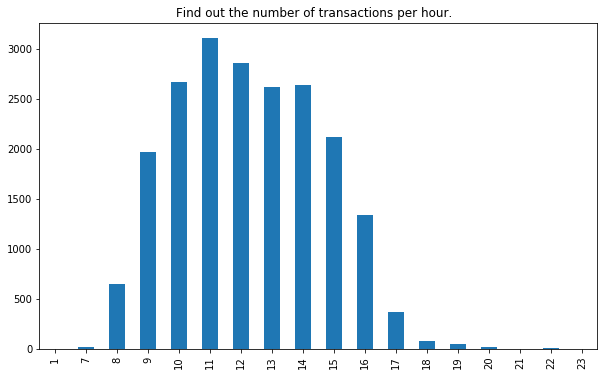

In [162]:
#7.     Find out the number of transactions per hour. 
data7 = data['Hour'].value_counts()
data7a=data7.sort_index()
print(data7a)
plt.figure(figsize=(10,6))
data7a.plot(kind='bar')
plt.title('Find out the number of transactions per hour.  ')


Bread       3325
Tea         1435
Cake        1025
Pastry       856
Sandwich     771
Name: Item, dtype: int64


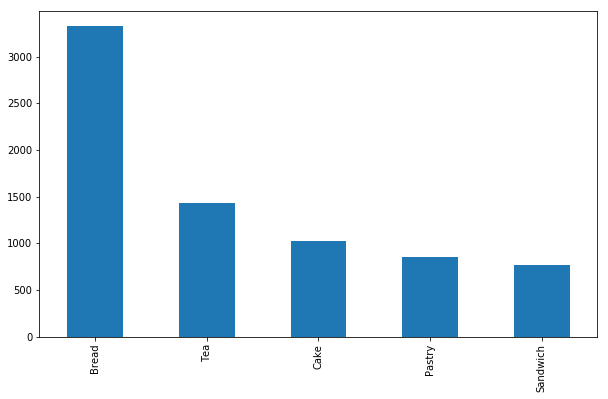

In [165]:
#8.     Find out the best item combinations with coffee.    
#grp1.drop(grp1[grp1['Item']!='Coffee'].index, inplace=True)
data8 = data[ data['Item'].str.contains('Coffee')]['Transaction'].unique()
data8 = pandas.DataFrame(data8,columns=['Transaction'])
data8a=data8.merge(data, left_on='Transaction',right_on='Transaction',how='right')
data8a = data8a[~data8a.Item.str.contains('Coffee')]['Item'].value_counts()
data8b=data8a.sort_values(ascending = False).head(5)
print(data8b)
plt.figure(figsize=(10,6))
data8a[:5].plot(kind='bar')
plt.show()

Date
2017-02-04    72
2017-03-04    57
2017-02-26    57
2017-01-28    56
2017-02-05    55
dtype: int64


C:\Users\Shivam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Find out the five most Coffee Sales day in 2017.  ')

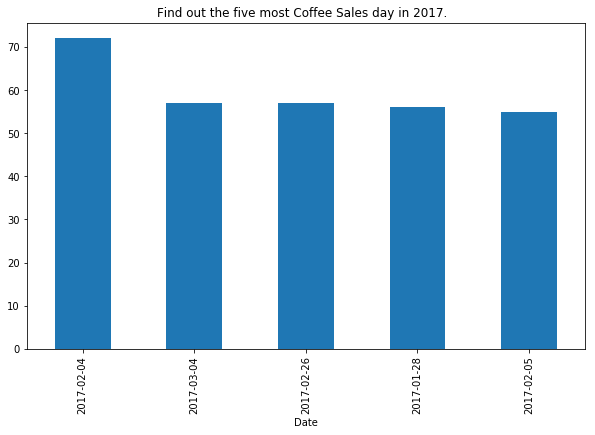

In [167]:
#9.     Find out the five most Coffee Sales day in 2017.
data9a = data[data.Date > '2016-12-31']
data9b = data9a[data.Item=='Coffee']
data9c=data9b.groupby('Date').size().sort_values(ascending = False).head(5)
print(data9c)
plt.figure(figsize=(10,6))
data9c.plot(kind='bar')
plt.title('Find out the five most Coffee Sales day in 2017.  ')

0    360
1    350
2    405
3    450
4    527
5    760
6    473
Name: WeekDay, dtype: int64


Text(0.5, 1.0, 'Find out historical chart of Bread sold throughout the week.     ')

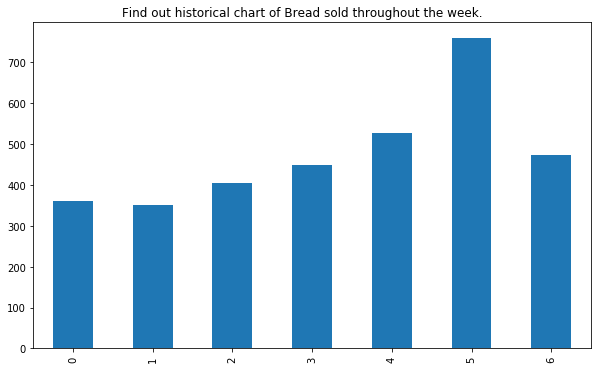

In [168]:
#10. Find out historical chart of Bread sold throughout the week.   
data10 = data[data.Item == "Bread"]
data10a=data10['WeekDay'].value_counts().sort_index()
# 0 = Monday  1 = Tuesday .......................... 6 = Sunday
print(data10a)
plt.figure(figsize=(10,6))
data10a.plot(kind='bar')
plt.title('Find out historical chart of Bread sold throughout the week.     ')